# Lagrange's method

### Simple implementation

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [2]:
x = np.linspace(0., 10., 5)
y = np.sin(2.*np.pi*x/10.)

In [3]:
x0 = np.linspace(-3., 13., 30)
y0 = np.sin(2.*np.pi*x0/10.)

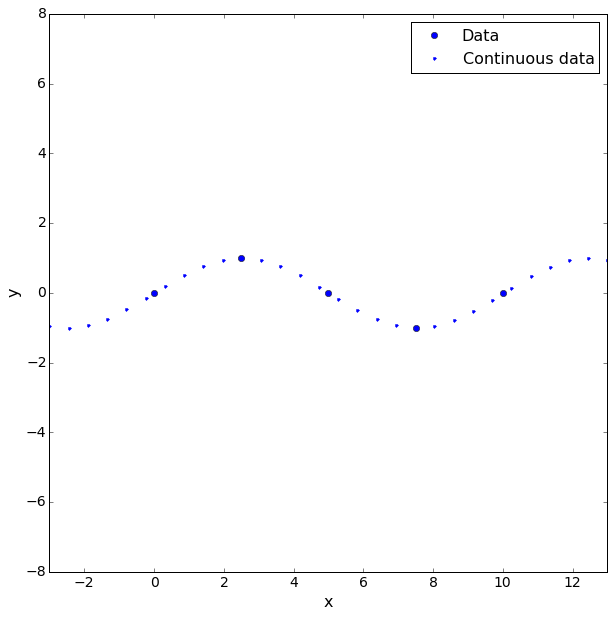

In [4]:
plt.figure(figsize=(10,10))
plt.axis('scaled')
plt.plot(x, y, 'bo', label='Data')
plt.plot(x0, y0, 'b.', label='Continuous data')
plt.xlim(np.min(x0), np.max(x0))
plt.ylim(-8., 8.)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', numpoints=1, fontsize=16)
plt.show()

In [5]:
l = np.empty_like(x)
indices = np.arange(x.size)
mask = (indices != 0)

my_result = np.empty_like(x0)
scipy_result = np.empty_like(x0)

In [6]:
for i, xc in enumerate(x0):
    for j, xj in zip(indices,x):
        l[j] = np.prod(xc - x[mask])
        l[j] /= np.prod(xj - x[mask])
        mask = np.roll(mask,1)

    my_result[i] = np.sum(l*y)

In [7]:
Lagrange = lagrange(x,y)

In [8]:
scipy_result = Lagrange(x0)

In [9]:
np.allclose(scipy_result, my_result)

True

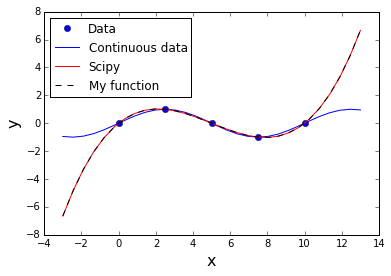

In [10]:
plt.figure()
plt.plot(x, y, 'bo', label='Data')
plt.plot(x0, y0, 'b-', label='Continuous data')
plt.plot(x0, scipy_result, 'r-', label='Scipy')
plt.plot(x0, my_result, 'k--', label = 'My function')
plt.legend(loc='best', numpoints=1)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend(loc='best', numpoints=1)
plt.show()

### Exercise 23